In [1]:
%load_ext autoreload
%autoreload 2

!!! info

    Pretrained checkpoint for autoregressive only models are available at : `gs://valence-experiments/safe/generative-model/`

In [2]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
import safe as sf
import datamol as dm
from safe.trainer.data_utils import get_dataset
from safe import SAFEDesign

In [26]:
designer = SAFEDesign.load_default(verbose=True)
candidate_mol = "O=C(C#CCN1CCCCC1)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1"

scaffold = "[*]N-c1ccc2ncnc(-N[*])c2c1" # this is for scaffold decoration
superstructure = "c1ccc2ncncc2c1"
side_chains = '[1*]C(=O)C#CCN1CCCCC1.[2*]c1cccc(Br)c1' # this is for scaffold morphing
motif = "[*]-N1CCCCC1" # this is for motif extension
linker_generation = ["[*]-N1CCCCC1", "Brc1cccc(Nc2ncnc3ccc(-[*])cc23)c1"] # this is for linker generation


We start with the image shown in the README of the SAFE GitHub Repository to assess the performance on the various tasks SAFE should in theory be good at. 

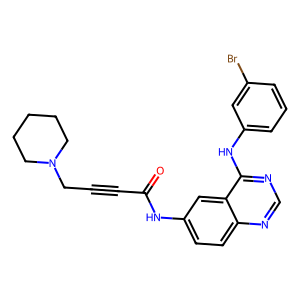

In [5]:
dm.to_image(dm.to_mol(candidate_mol))

In [8]:
N_SAMPLES = 100

## De novo generation

Generation of novel molecules without any constraints.

In [9]:
generated = designer.de_novo_generation(sanitize=True, n_samples_per_trial=N_SAMPLES)

2023-08-29 13:02:50.164 | INFO     | safe.sample:de_novo_generation:559 - After sanitization, 83 / 100 (83.00 %)  generated molecules are valid !


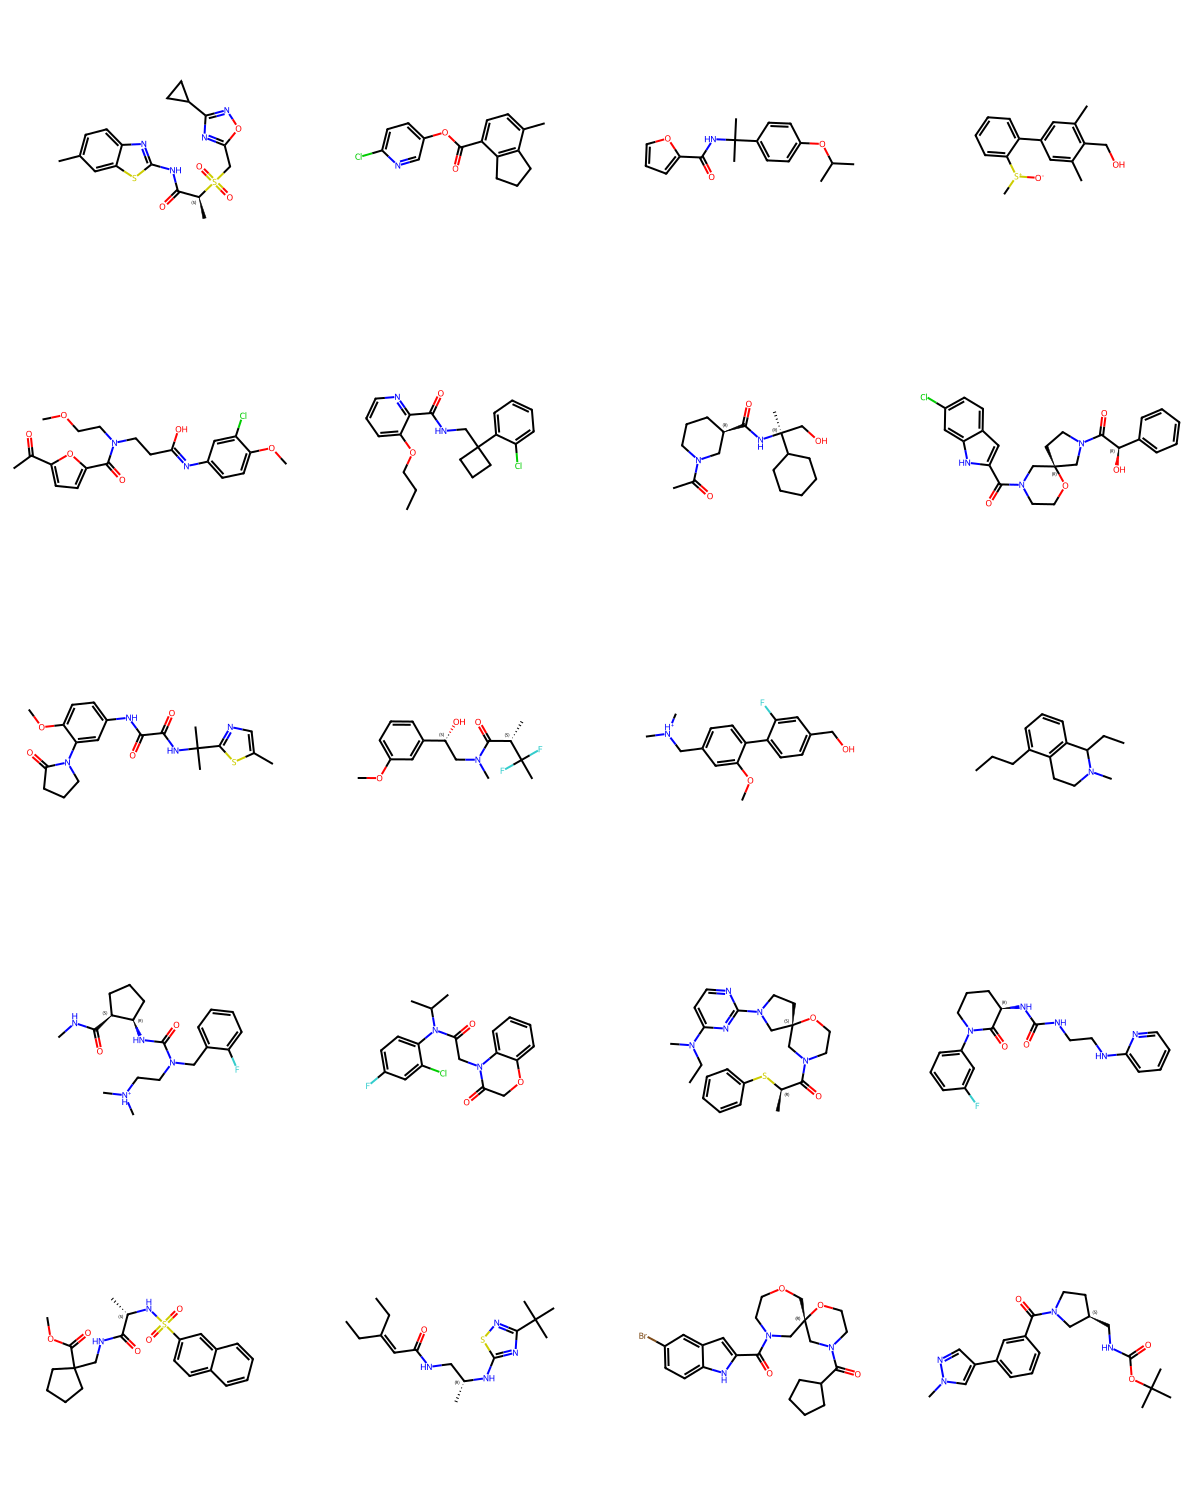

In [10]:
dm.to_image(generated[:20])

## Scaffold Decoration

For scaffold decoration, we wish to generate new molecules that would contain a given scaffold as core. Usually, the attachment point on the scaffold should dictate where the new vectors will be added.

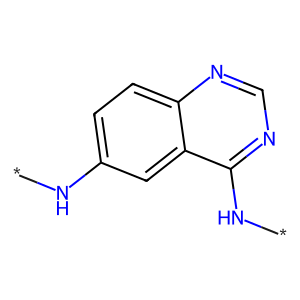

In [13]:
dm.to_image(scaffold)

In [11]:
generated = designer.scaffold_decoration(scaffold=scaffold, n_samples_per_trial=N_SAMPLES, n_trials=2, sanitize=True, do_not_fragment_further=True)

2023-08-29 13:04:22.479 | INFO     | safe.sample:scaffold_decoration:534 - After sanitization, 171 / 200 (85.50 %)  generated molecules are valid !


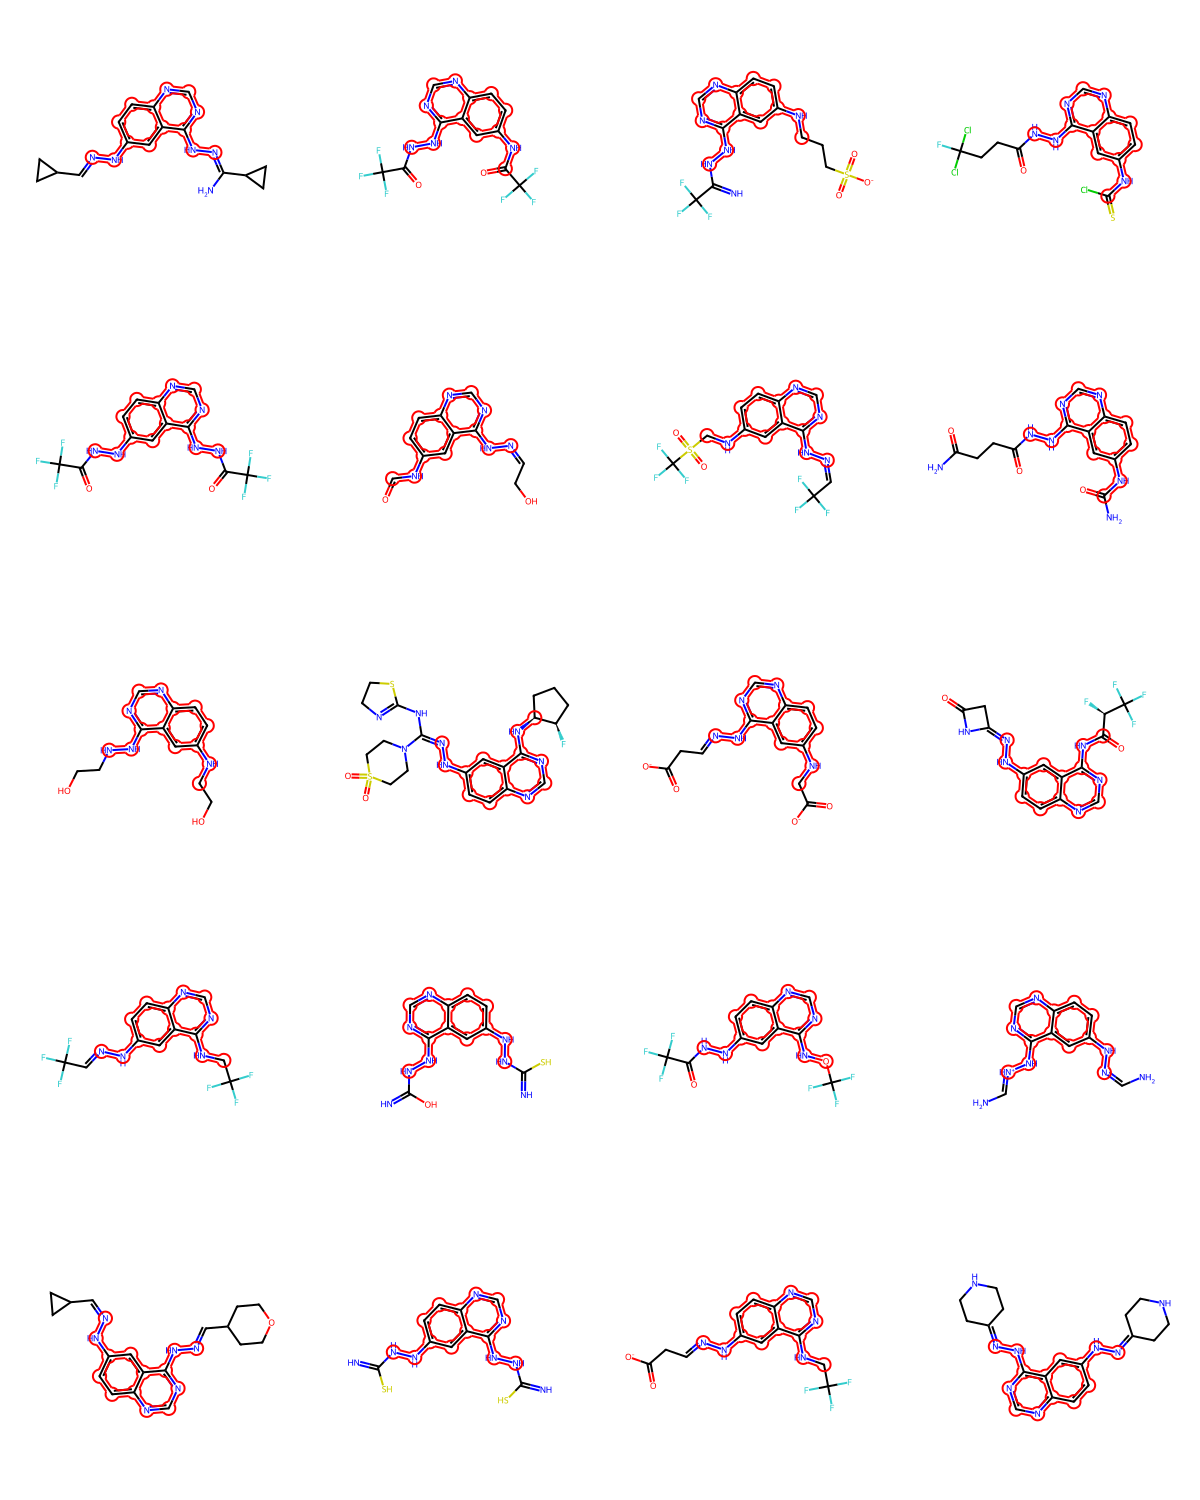

In [12]:
dm.viz.lasso_highlight_image([dm.to_mol(x) for x in generated[:20]], dm.from_smarts(scaffold))

## Super structure generation

In super structure generation, we just want to generate superstructure of a molecular subgraph

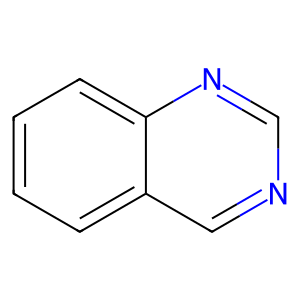

In [14]:
dm.to_image(superstructure)

In [16]:
generated = designer.super_structure(core=superstructure, n_samples_per_trial=N_SAMPLES, n_trials=1, sanitize=True, do_not_fragment_further=False, attachment_point_depth=3)
#generated

2023-08-29 13:04:59.082 | INFO     | safe.sample:super_structure:488 - After sanitization, 98 / 100 (98.00 %)  generated molecules are valid !


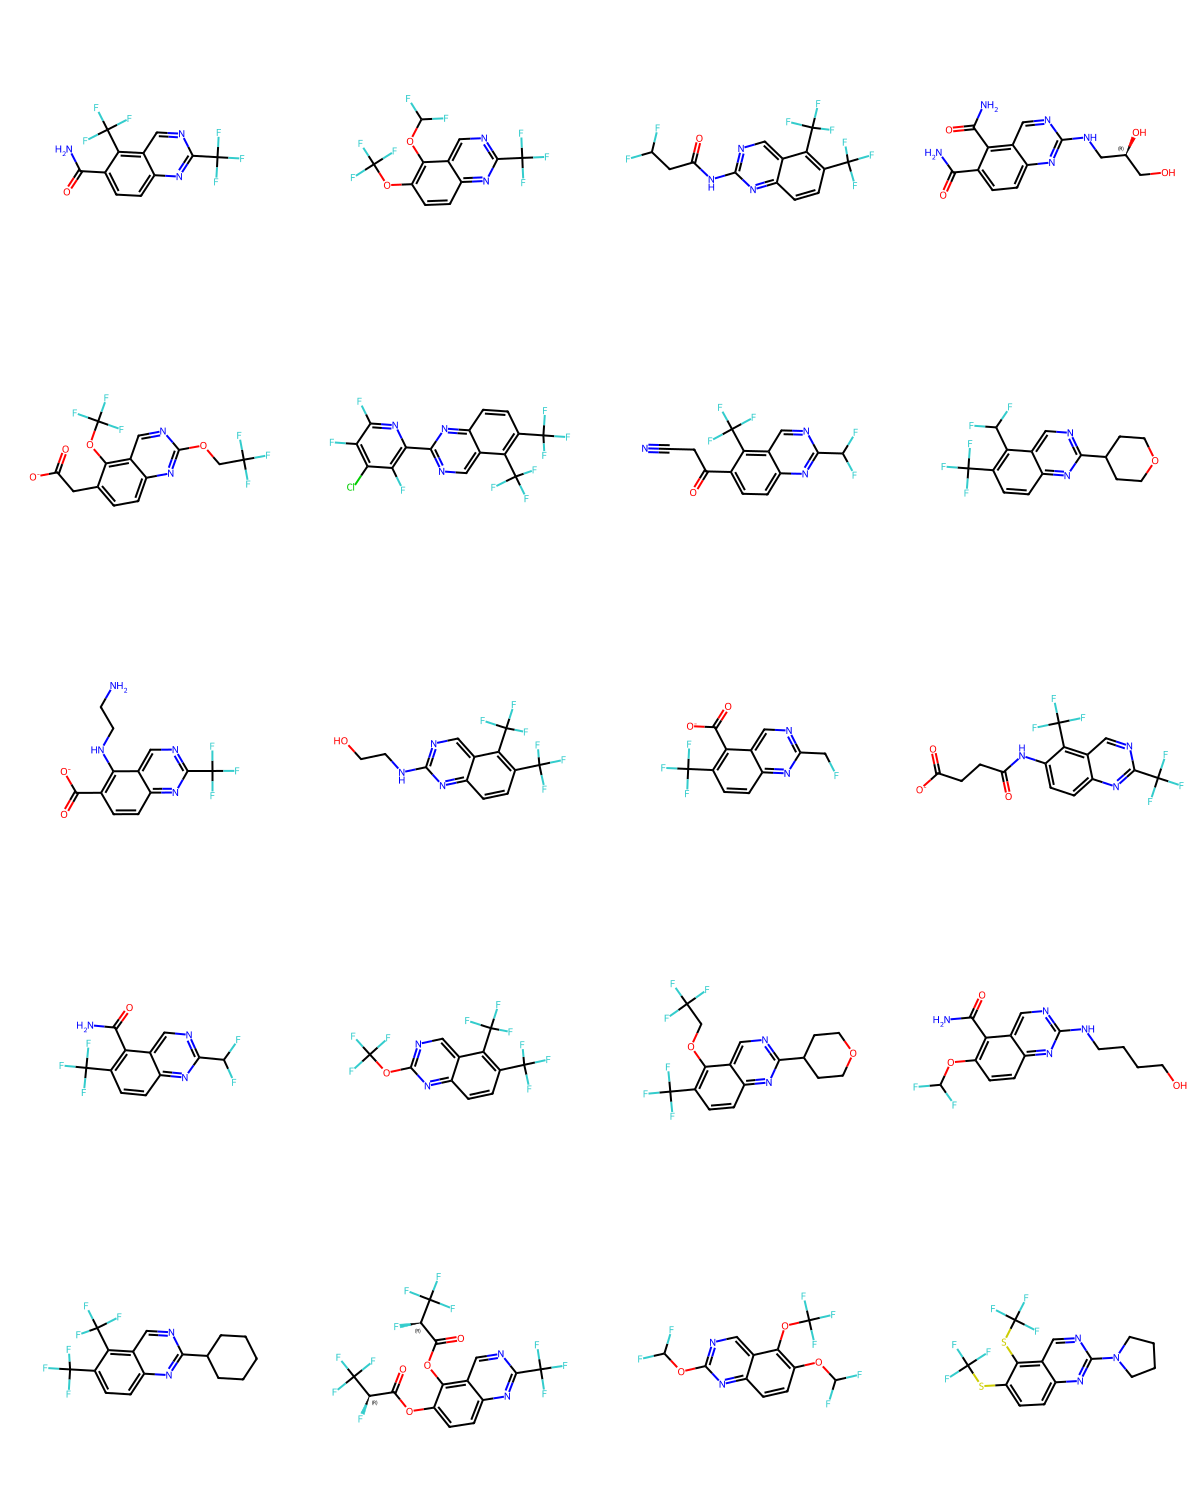

In [17]:
dm.to_image(generated[:20])

## Motif Extension

In motif extension, we are interested in generating a molecule containing a given motif as starting point.

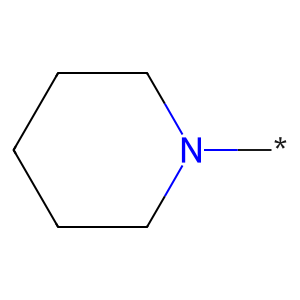

In [18]:
dm.to_image(motif)

In [19]:
# let's make some long sequence
generated = designer.motif_extension(motif=motif, n_samples_per_trial=N_SAMPLES, n_trials=1, sanitize=True, do_not_fragment_further=False, min_length=25, max_length=80)

2023-08-29 13:05:21.722 | INFO     | safe.sample:scaffold_decoration:534 - After sanitization, 97 / 100 (97.00 %)  generated molecules are valid !


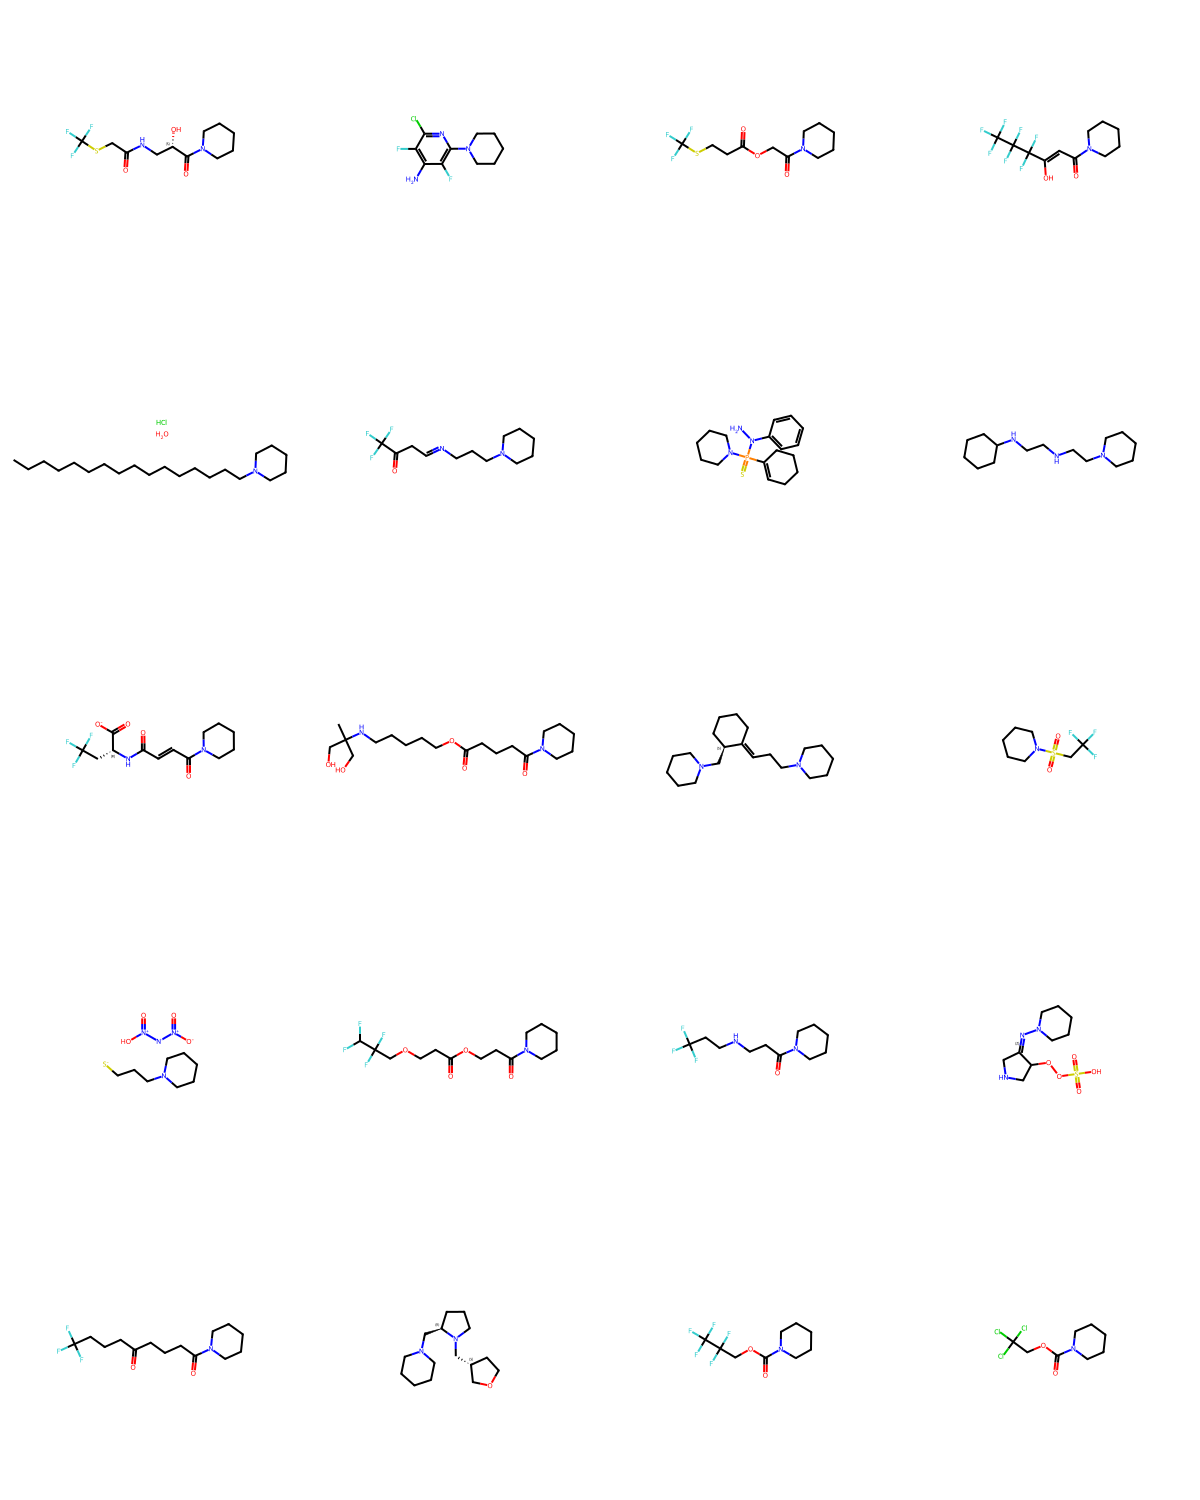

In [20]:
dm.to_image(generated[:20])

## Scaffold Morphing

In scaffold morphing, we wish to replace a scaffold by another one in a molecule. The process requires as input that the user provides either the side chains or the input molecules and the core

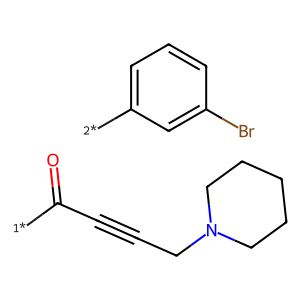

In [21]:
dm.to_image(side_chains)

2023-08-29 13:05:56.132 | INFO     | safe.sample:_fragment_linking:389 - After sanitization, 100 / 100 (100.00 %)  generated molecules are valid !


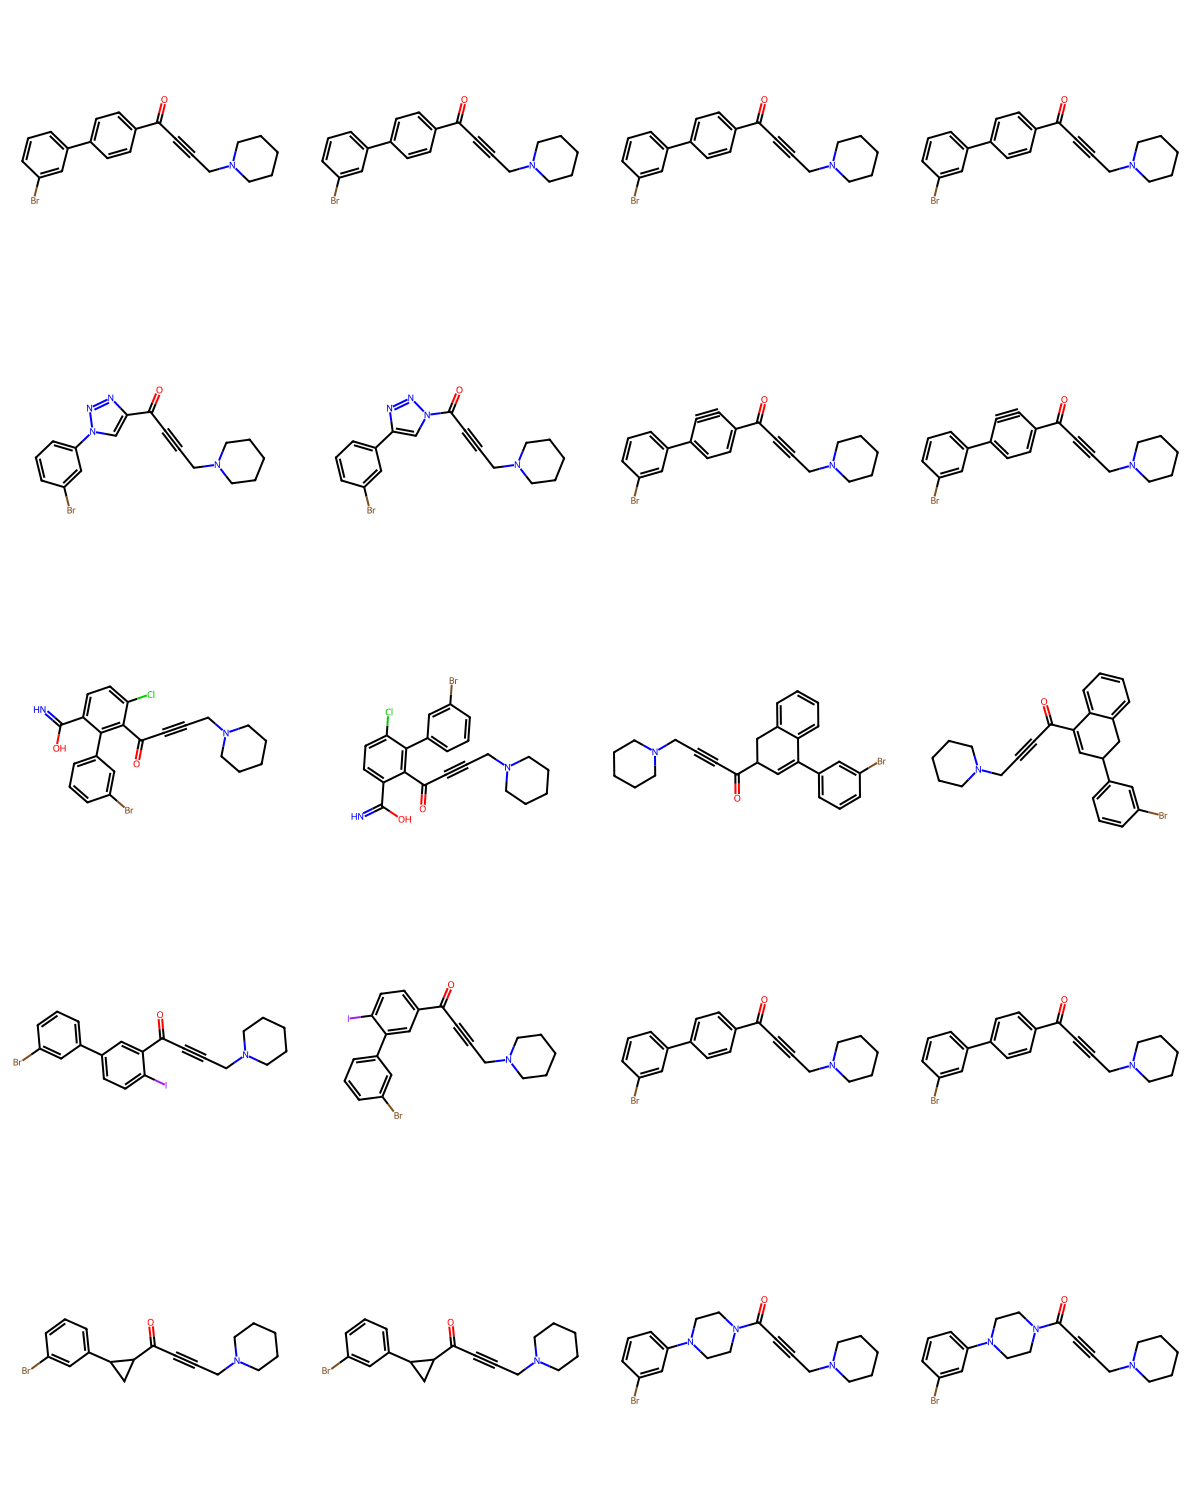

In [22]:
generated = designer.scaffold_morphing(side_chains=side_chains, n_samples_per_trial=N_SAMPLES, n_trials=1, sanitize=True, do_not_fragment_further=False, random_seed=100)
dm.to_image(generated[:20])

## Linker generation

Linker generation is mostly the same thing as scaffold morphing ...

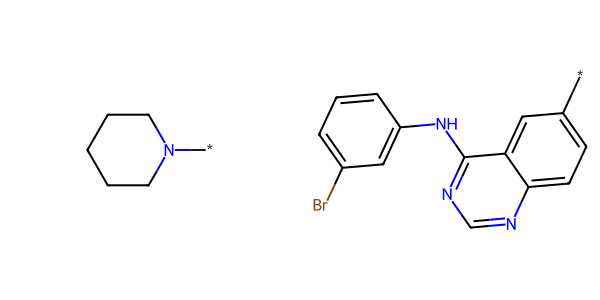

In [27]:
dm.to_image(linker_generation)

2023-08-29 13:06:57.902 | INFO     | safe.sample:_fragment_linking:389 - After sanitization, 100 / 100 (100.00 %)  generated molecules are valid !


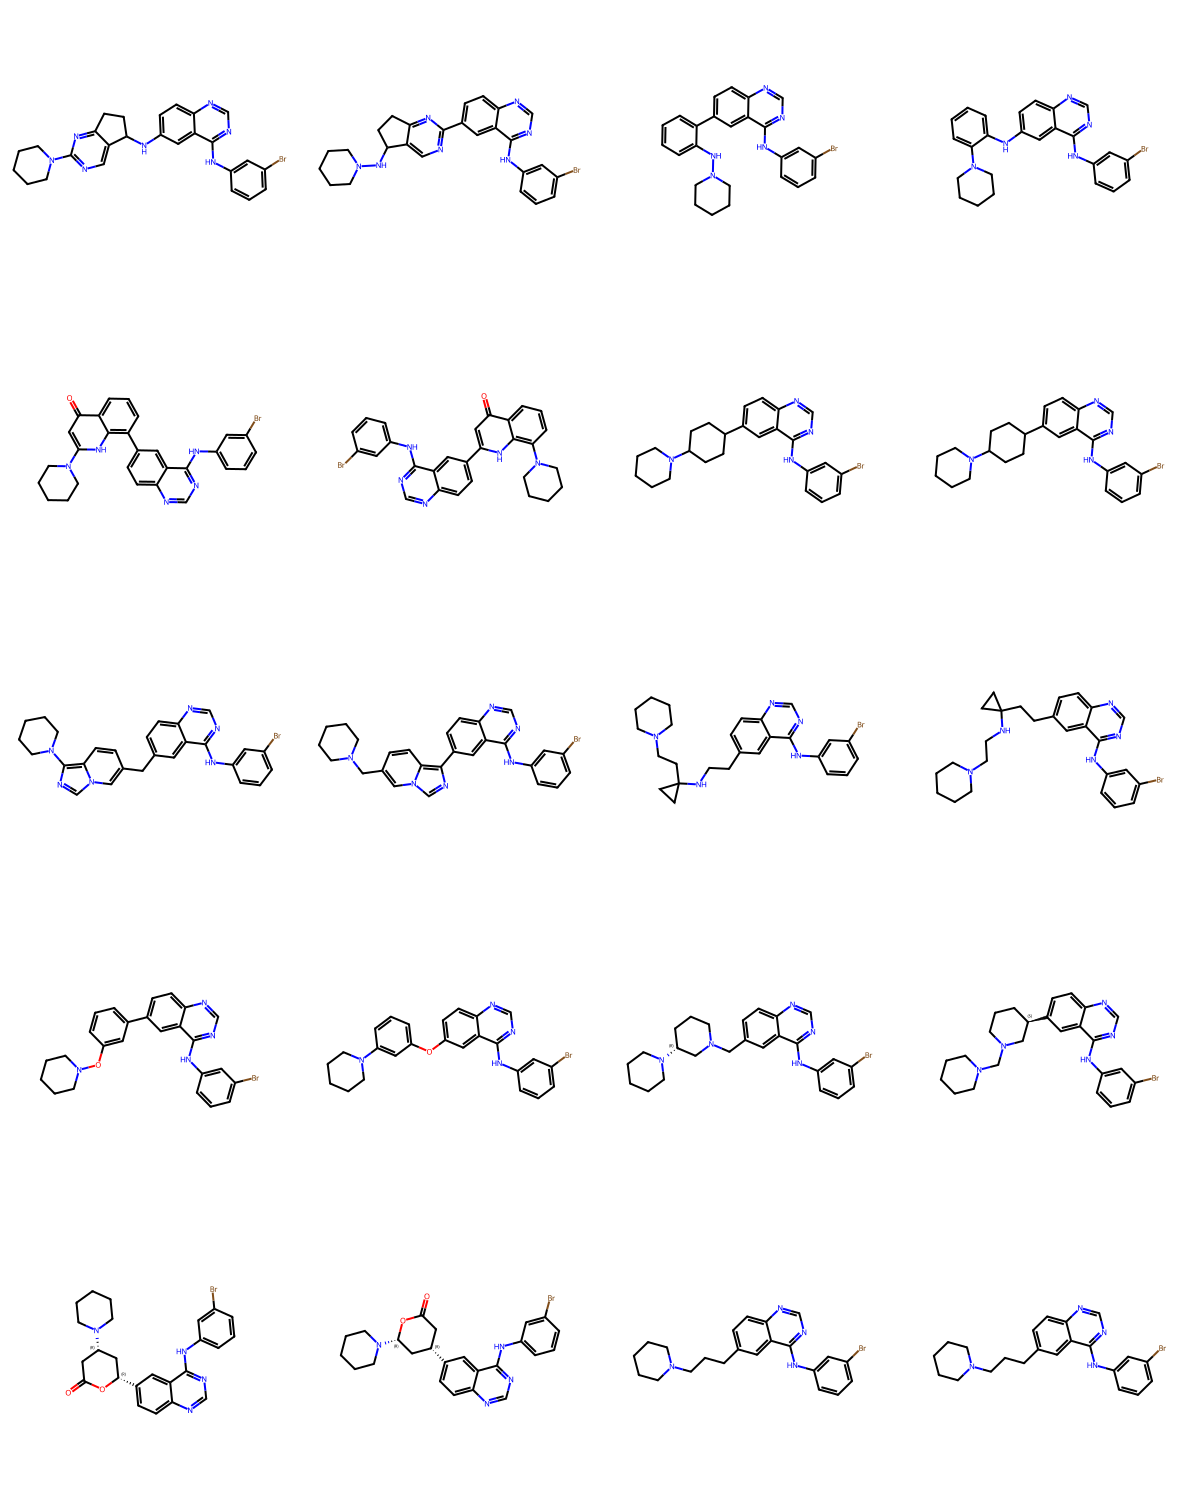

In [28]:
generated = designer.linker_generation(*linker_generation, n_samples_per_trial=N_SAMPLES, n_trials=1, sanitize=True, do_not_fragment_further=False, random_seed=100)
dm.to_image(generated[:20])